# Level4 task for HKUST VisLab Coding Challenges.
#### Four main challenges are included in this level of task.
#### Details are included in each section

### Preperations

#### Load necessary libraries and take an insepction into the data.

In [1]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv("data.csv")
display(df)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


#### Create index for further manipulating data.

In [3]:
df.reset_index(drop=True, inplace=True)
df.index = pd.to_datetime(df["Date"])
df.index = [df.index.year, df.index.month]
df.index.names = ["year", "month"]

### Task1
List the top 10 tracks in the global throughout year 2017 with their total stream counts.

In [4]:
df_task1 = df
df_task1 = df_task1.loc[2017]
df_task1 = df_task1.groupby("Track Name").agg({"Streams": "sum"})

In [5]:
display(df_task1.sort_values(by="Streams", ascending=False).head(10))

,Streams
Track Name,
Shape of You,2954314942
Despacito - Remix,1808988398
Despacito (Featuring Daddy Yankee),1449083311
Something Just Like This,1366414897
Unforgettable,1341220672
HUMBLE.,1288359986
I'm the One,1241605052
rockstar,1186411578
It Ain't Me (with Selena Gomez),1179203261


### Task2
List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks.

Some artists may have more than 10 tracks while some are not, in this task I only list top 10 artists with top 5 stream counts of each of their track.

In [6]:
top10_artists = df.groupby(by=["Artist"]).agg({"Streams": "sum"})
top10_artists = list(top10_artists.sort_values(by="Streams", ascending=False).head(10).index)
df_task2 = df[df["Artist"].isin(top10_artists)]
df_task2 = df_task2.groupby(by=["Artist", "Track Name"]).agg({"Streams": "sum"})
df_task2_helper = []
for artist in top10_artists:
    df_temp = df_task2.loc[artist].sort_values(by="Streams", ascending=False).head(5)
    df_temp[artist] = artist
    df_temp["Track Name"] = df_temp.index
    df_temp.set_index(artist, inplace=True)
    df_task2_helper.append(df_temp)
display(pd.concat(df_task2_helper))

,Streams,Track Name
Ed Sheeran,2993988783,Shape of You
Ed Sheeran,1008408812,Perfect
Ed Sheeran,950641030,Castle on the Hill
Ed Sheeran,895638000,Galway Girl
Ed Sheeran,441132246,Photograph
Drake,814894648,Passionfruit
Drake,654779932,One Dance
Drake,587832754,Fake Love
Drake,359767833,Portland
Drake,272746240,Signs


### Task3
List the top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania).

In [7]:
df_task3 = df
df_task3 = df_task3.loc[2017, 12]

/Users/shuaihanxu/opt/anaconda3/envs/pandas/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [8]:
countries = pd.read_json("countries.json")
countries = dict(zip(countries.columns.str.lower() ,countries.iloc[3].to_list()))
df_task3["Continent"] = df_task3["Region"]
df_task3 = df_task3.replace({"Continent": countries})

/Users/shuaihanxu/opt/anaconda3/envs/pandas/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df_task3 = df_task3.groupby(by =["Continent", "Track Name"]).agg({"Streams": "sum"})
continents = ["NA", "EU", "AS", "SA", "OC"]
df_task3_helper = []
for continent in continents:
    df_temp = df_task3.loc[continent].sort_values(by="Streams", ascending=False).head(10)
    df_temp[continent] = continent
    df_temp["Track Name"] = df_temp.index
    df_temp.set_index(continent, inplace=True)
    df_task3_helper.append(df_temp)
display(pd.concat(df_task3_helper))

,Streams,Track Name
NA,62265844,rockstar
NA,40603607,Gucci Gang
NA,33811360,Havana
NA,32428856,I Fall Apart
NA,30647154,No Limit
NA,30549341,Ric Flair Drip (& Metro Boomin)
NA,30367655,All I Want for Christmas Is You
NA,29233567,Him & I (with Halsey)
NA,28804277,Too Good At Goodbyes
NA,28639843,Candy Paint


### Task4
Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.

In [10]:
df_task4 = df

### Calculate the ranking in each month

In [11]:
ranking = []
stream = []
date = []
for y in [2017, 2018]:
    for m in range(1, 13):
        try:
            monthly = df_task4.loc[y, m]\
                            .groupby(by=["Artist", "Track Name"])\
                            .agg({"Streams": "sum"})\
                            .sort_values(by="Streams", ascending=False)
            monthly["Index"] = monthly.index
            month_stream=monthly[monthly["Index"] == ("Ed Sheeran", "Shape of You")]
            stream.append(5*month_stream["Streams"]/1e8)
            monthly.reset_index(drop=True, inplace=True)
            month_ranking = monthly[monthly["Index"] == ("Ed Sheeran", "Shape of You")]
            ranking.append(month_ranking.index[0]+1)
            date.append("{}-{}".format(y, m))
        except:
            print("No records for {} - {}".format(y, m))
            


/Users/shuaihanxu/opt/anaconda3/envs/pandas/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


No records for 2018 - 2
No records for 2018 - 3
No records for 2018 - 4
No records for 2018 - 5
No records for 2018 - 6
No records for 2018 - 7
No records for 2018 - 8
No records for 2018 - 9
No records for 2018 - 10
No records for 2018 - 11
No records for 2018 - 12


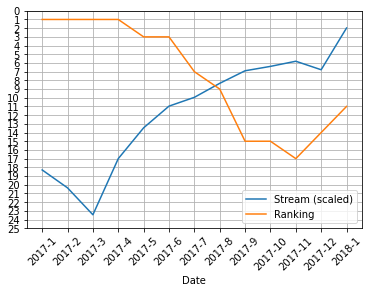

In [12]:
plt.xticks([x for x in range(len(ranking))], date, rotation=45)
plt.plot([x for x in range(len(ranking))], stream, label="Stream (scaled)")
plt.plot([x for x in range(len(ranking))], ranking, label="Ranking")
plt.legend()
ax = plt.gca()
ax.set_ylim(25, 0)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.grid(b=True)
plt.xlabel("Date")
plt.show()